<a href="https://colab.research.google.com/github/marcoscarvalho96/data_science/blob/main/%5BPROJETO%5DAvalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação do Risco de Concessão de Crédito

Desde o princípio da concessão de crédito por parte de bancos, financeiras e/ou empresários, a inadimplência tem sido um grande problema trazido por parte dos clientes da carteira.


Constantemente essas instituições tem investido capital financeiro e humano para desenvolver sistemas que façam análise de perfil dos consumidores para predizer aqueles que estão mais propensos a se endividar e consequentemente deixar de cumprir com seus pagamentos. 


Normalmente o não pagamento de dívidas é causado por insufiência financeira dos clientes e/ou falta de educação financeira para melhor adequação dos gastos e adesão de crédito. O termo utilizado para para indicar o não cumprimento dos pagamentos de cartão de crédito e/ou empréstimos, é entitulado *Default*.

<p align=center>
  <img src="http://sigmoidal.ai/wp-content/uploads/2019/10/2940191.jpg" height="300px">
</p>

*Machine Learning* tem sido um grande aliado de instituições financeiras para prevenir os possíveis clientes inadimplentes. 


Dentre as diversas instituições financeiras que temos no país, o [Nubank](https://nubank.com.br/) têm se destacado por ser uma empresa Data Driven e que se utiliza de Inteligência Atificial e Ciência de Dados para ter um processo de concessão de crédito cada vez mais otimizado.


Para o modelo que criaremos neste projeto, utilizaremos um conjunto de dados disponibilizado pelo próprio [Nubank](https://nubank.com.br/) para uma competição que revelaria possíveis talentos e contratações. 

### Contextualização do problema

Neste problema buscamos prever qual a probabilidade de um cliente da Startup deixar de realizar os pagamentos de suas faturas do produto *cartão de crédito*.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="120px"></p>

É de suma importância que o modelo seja utilizado no momento em que o cliente solicite o cartão, visando assim reduzir o indice de inadimplência, consequentemente as perdas financeiras e também a redução de falsos positivos. 


## Importando os dados

Os dados utilizados para o modelo estão disponíveis em modo `csv` e pode ser feito o download [neste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). É uma base de dados com 45.001 linhas e 43 colunas. 

Para possibilitar a manipulação e análise dos dados, utilizaremos a biblioteca `pandas` para adequar os dados em um dataframe.

In [2]:
# importando os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#definindo o estilo do seaborn para os plots
sns.set_style()

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

# Análise exploratória dos dados

Após importamos a base de dados, iremos examinar o tamanho do nosso *DataFrame*, assim como suas primeiras entradas. Com isso, teremos maior visualização da estrutura geral da nossa base de dados.

Lembrando que nosso `dataset` possui 45.000 linhas e 43 colunas.

In [4]:
# dimensões do DataFrame

print('DIMENSÕES DO DATAFRAME')
print("Linhas:\t\t{}".format(df.shape[0]))
print("Linhas:\t\t{}".format(df.shape[1]))

DIMENSÕES DO DATAFRAME
Linhas:		45000
Linhas:		43


Analisando as primeiras 5 linhas do nosso *DataFrame* podemos ter uma noção dos tipos de dados, formatos de entrada e extrair algumas hipóteses de como está configurado.

In [5]:
# imprimindo as 5 primeiras linhas
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Com essa análise prévia podemos extrair algumas conclusões, sendo elas: 

* A coluna *ids* representa um identificador único de clientes, por não ser relevante para nossa avaliação, iremos removê-la;
* A variável alvo *Default*(inadimplência) pode ser localizada na coluna *target_default*;
* Temos as colunas `['score_1' e 'score_2']` com alguma espécie de codificação que teremos de analisar mais a frente a relevância desses dados para o nosso modelo e se é há alguma classe que possa ser convertida em informação relevante, já as colunas `['score_3',  'score_4' , 'score_5', 'score_6']` são variáveis numéricas;
* Outras variáveis que teremos de analisar para verificar se é possível extrair alguma informação útil, pois também estão codificadas, são: `['reasons','state','zip', 'channel', 'job_name', real_state']`;
* Temos na coluna `profile_tags` um dicionário com *tags* que são ao que parece atribuídas a cada cliente;
* Caso estivéssemos construindo um modelo de prevenção a fraude, poderíamos utilizar a coluna `'target_fraud'`, mas não será útil neste momento; 
* A coluna `'lat_lon'` possui uma tupla com as coordenadas e está determinada como *string*.

In [6]:
# resumo estatístico dos dados históricos 

df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Com o resumo estatístico em mãos, podemos fazer mais algumas observações: 
* Na coluna `'external_data_provider_credit_checks_last_2_year'` temos valores nulos para mínimo, máximo e desvio-padrão;
* Iremos substituir os valores da coluna `'reported_income'` que apresentem valores do tipo *inf* por valores do tipo np.nan para que possamos utilizar os dados no modelo;
* Após analisar a coluna `'external_data_provider_email_seen_before'` , foi encontrando o valor mínimo -999 o que constatamos ser um outlier, todas as células que contenham o valor -999 serão substituidas por `'np.nan'`

Agora iremos analisar os tipos de variáveis que compõem a nossa base de dados para analisar se todas estão configuradas corretamente, afim de obter informações concisas e evitar possíveis erros.

In [7]:
# tipos das variáveis na base de dados
print("\nTIPOS DE VARIÁVEIS: ")
print(df.dtypes)


TIPOS DE VARIÁVEIS: 
ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip               

Precisamos também analisar a quantidade de dados ausentes em cada coluna do nosso dataset, pois, caso isso não seja tratado, pode influenciar negativamente o resultado de nosso modelo.

In [8]:
# identificando valores ausentes
print("\nVALORES AUSENTES:")
print((df.isnull().sum()/ df.shape[0]).sort_values(ascending=False))


VALORES AUSENTES:
target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_def

A cerca da porcentagem de valores ausentes: 

* Variáveis como `['target_fraud','last_amount_borrowed','last_borrowed_in_months','ok_since','external_data_provider_credit_checks_last_2_year','credit_limit','n_issues']`  possuem mais de 50% dos valores ausentes;
* Nas variáveis `['external_data_provider_credit_checks_last_year', 'credit_limit', 'n_issues']` temos um range de 25-34% de valores ausentes;
* Em nossa variável alvo `target_deafult` também possui valores ausentes que serão descartados mais a frente para que utilizemos apenas as informações concisas.

Mesmo que a variável *target_fraud* possua mais de 50% de valores ausentes, não é para nós um problema, pois, por mais que seja uma variável alvo, não exerce influência sobre os indíces de inadimplência, já as demais variáveis com mais de 50% de valores ausentes iremos tratar e usá-las com cautela. 


In [9]:
# busca por valores únicos 
print('\nVALORES ÚNICOS:')
print(df.nunique().sort_values())


VALORES ÚNICOS:
external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               

Analisando a contagem de valores únicos, constatamos que as colunas `external_data_provider_credit_checks_last_2_year` e `channel` apresentam apenas um único valor, por não termos maiores informações a cerca dos dados de cada feature, descartaremos essas colunas para que não interfiram no resultado do nosso modelo de Machine Learning.

Já na coluna `profile_phone_number` com cerca de 45 mil valores únicos, não se faz necessária em nossa análise, pois, o número de telefone dos usuários não é um dado relevante para nosso modelo e objetivo.  

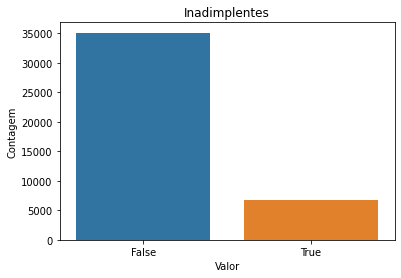

Proporção entre Inadimplentes no DataSet:
False    0.779556
True     0.148022
Name: target_default, dtype: float64


In [10]:
# calculando a proporção de inadimplentes no DataSet
fig, ax=plt.subplots()
sns.countplot('target_default',data=df, ax=ax)
ax.set_title('Inadimplentes')
ax.set_xlabel('Valor')
ax.set_ylabel('Contagem')
plt.show()

print('Proporção entre Inadimplentes no DataSet:')
print(df['target_default'].value_counts() / df.shape[0])

Analisando os valores expostos pelo gráfico acima, constatamos que cerca de 15% dos clientes em algum momento de sua vida como cliente ficarão inadimplentes, a partir dessa premissa iremos começar a preparação dos dados para o nosso modelo.

# Preparação dos Dados

Com tudo que adquirimos de informações nas etapas anteriores, seguiremos agora com a limpeza e preparação dos dados para podermos aplicar os algoritmos do nosso modelo. 

In [13]:
df_clean = df.copy()

# substituindo os valores inf por nan na coluna reported_income
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf,np.nan)

# descartando as colunas ids, target_fraud, 
# external_data_provider_credit_checks_last_2_year e channel
df_clean.drop(labels=['ids','target_fraud',
                      'external_data_provider_credit_checks_last_2_year',
                      'channel'], axis=1, inplace=True)

# substituindo os valores -999 em external_data_provider_email_seen_before por NaN
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan
          
# eliminando as colunas sem informação aparente ou que demanda mais pesquisa
drop_var = ['reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'profile_phone_number', 'shipping_state']
df_clean.drop(labels=drop_var,axis=1,inplace=True)

# eliminando as entradas onde target_default é NaN
df_clean.dropna(subset=['target_default'], inplace=True)